In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="ux_designer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Eightfold.AI,UX Designer,Bengaluru,500000.0,"iOS, Visual design, Machine learning, UX, User...",3.2,UX Designer
1,Wadhwani AI,UI/UX Intern,Delhi,0.0,"Research, User research, Hindi, AI, Figma",3.2,UX Designer
2,SAP,User Experience Design Specialist,Bengaluru,700000.0,"SAP, ERP systems, English, Machine learning, UX",4.2,UX Designer
3,Micron,Senior UX designer – IT TBMO,Hyderābād,700000.0,"CSS, Research, Adobe Creative Suite, Project m...",3.8,UX Designer
4,SAP,User Experience Design Expert,Bengaluru,700000.0,"Enterprise Software, SAP, ERP systems, English...",4.2,UX Designer


In [62]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    31
company_rating           395
standardized_job_role      0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
1,Wadhwani AI,UI/UX Intern,Delhi,0.0,"Research, User research, Hindi, AI, Figma",3.2,UX Designer
5,Wadhwani AI,Senior UI/UX Designer,Delhi,0.0,"Typography, Research, Colour theory, UX, UI",3.2,UX Designer
8,Remunance,Front-end UI Developer – AI Worker Interface,Remote,0.0,"React, UI, AI",4.5,UX Designer
9,Dicetek LLC,UI UX Developer,Remote,0.0,"Jira, Web accessibility, Ant, CSS, React",4.3,UX Designer
11,Shamlatech,UI Developer,India,0.0,"CSS, D3.js, JavaScript, Angular, UI",3.7,UX Designer
...,...,...,...,...,...,...,...
1003,SankalpTaru,UI/UX Designer,India,0.0,"Branding, Typography, CSS, Mobile applications...",3.8,UX Designer
1008,Interactive pixels,UI/UX Designer / Developer,Delhi,0.0,UI,NaN,UX Designer
1010,Pimarq,UI/UX Designer,Remote,0.0,"CI/CD, Azure, Business intelligence, CSS, Boot...",NaN,UX Designer
1011,Malus TechnoLab,Urgently Hiring UX/UI Designer,Bhubaneshwar,0.0,"Adobe Photoshop, Content management systems, A...",NaN,UX Designer


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Eightfold.AI,UX Designer,Bengaluru,5.000000,"iOS, Visual design, Machine learning, UX, User...",3.2,UX Designer
1,Wadhwani AI,UI/UX Intern,Delhi,5.871667,"Research, User research, Hindi, AI, Figma",3.2,UX Designer
2,SAP,User Experience Design Specialist,Bengaluru,7.000000,"SAP, ERP systems, English, Machine learning, UX",4.2,UX Designer
3,Micron,Senior UX designer – IT TBMO,Hyderābād,7.000000,"CSS, Research, Adobe Creative Suite, Project m...",3.8,UX Designer
4,SAP,User Experience Design Expert,Bengaluru,7.000000,"Enterprise Software, SAP, ERP systems, English...",4.2,UX Designer
...,...,...,...,...,...,...,...
1011,Malus TechnoLab,Urgently Hiring UX/UI Designer,Bhubaneshwar,4.039706,"Adobe Photoshop, Content management systems, A...",0.0,UX Designer
1012,Glarus Technology,Web Designer - (UI/UX),Kanpur Nagar,4.500000,"Web design, Adobe Photoshop, CSS, Bootstrap, M...",4.5,UX Designer
1013,Intuit Management Consultancy,UX / UI Designer,Chennai,5.000000,"CSS, iOS, Visio, Adobe Creative Suite, Graphic...",2.4,UX Designer
1014,prwatech technologies,UI/UX Designer Trainer,Bengaluru,42.000000,"CSS, Adobe Creative Suite, JavaScript, UX, Scrum",3.8,UX Designer


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,1016.000000,1016.000000
mean,8.971128,2.407087
std,9.707425,2.002547
min,0.060000,0.000000
25%,4.039706,0.000000
50%,6.000000,3.400000
75%,9.000000,4.200000
max,48.000000,5.000000


In [71]:
df.nunique()

company_name             962
job_role                 339
job_location              80
salary_lpa               155
skills                   838
company_rating            36
standardized_job_role      1
dtype: int64

In [72]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [74]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [75]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                 Skill  Count
12                 css    378
3                   ux    377
21     adobe photoshop    364
23   adobe illustrator    292
41            adobe xd    230
..                 ...    ...
200             kanban      1
199          openstack      1
198               adas      1
101         tensorflow      1
294                seo      1

[295 rows x 2 columns]


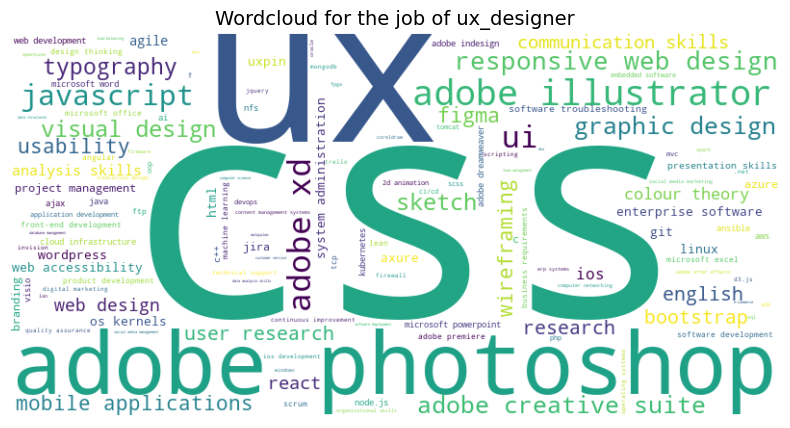

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


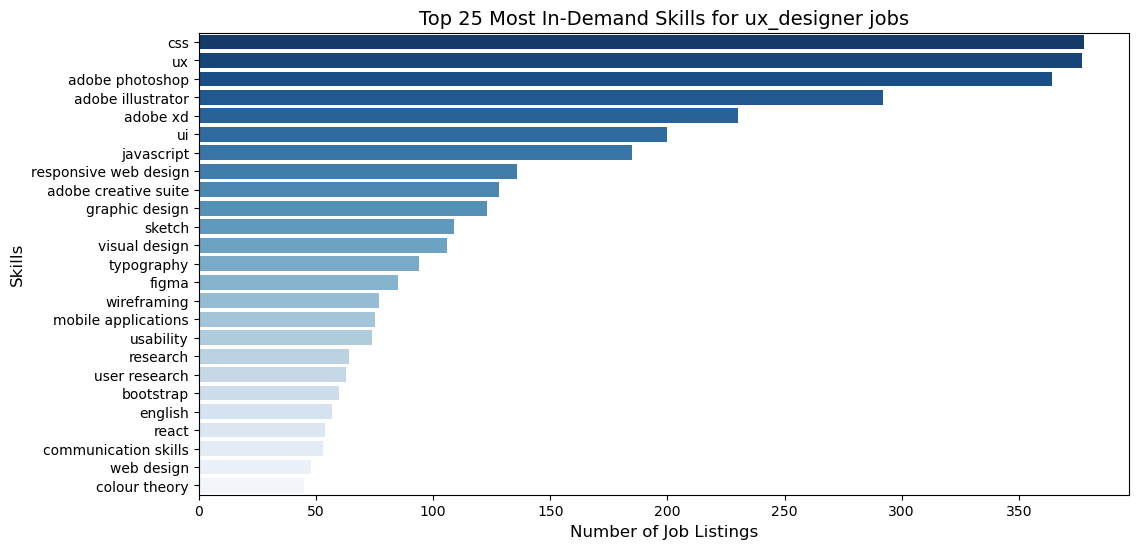

In [77]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [79]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                           company_name  salary_lpa
22                      ATEES INFOMEDIA        48.0
859                         WOWinfotech        48.0
449                   M&M Web Solutions        48.0
308                   GI Group Holdings        48.0
600             Protocloud Technologies        48.0
236                 Doomshell Softwares        48.0
61                            Amplework        48.0
654  Roadcast Tech. Solutions Pvt. Ltd.        48.0
902        Xotiv Technologies Pvt. Ltd.        48.0
742                          SynergyTop        48.0


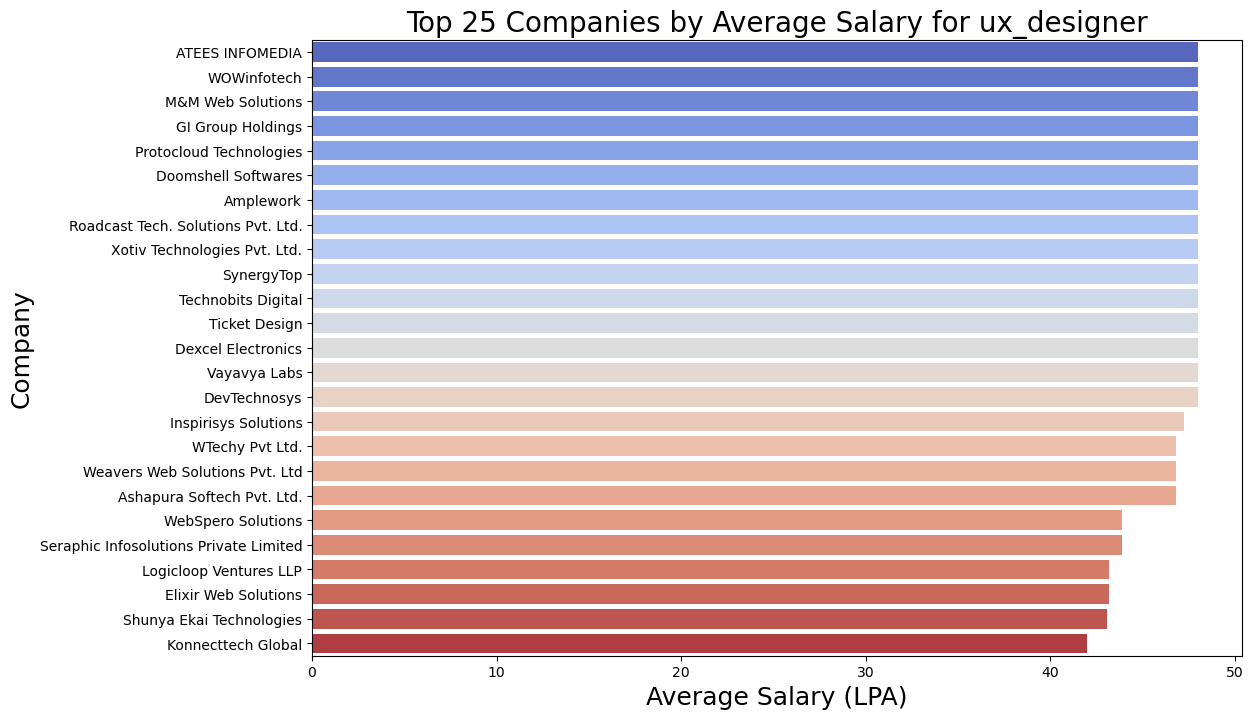

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

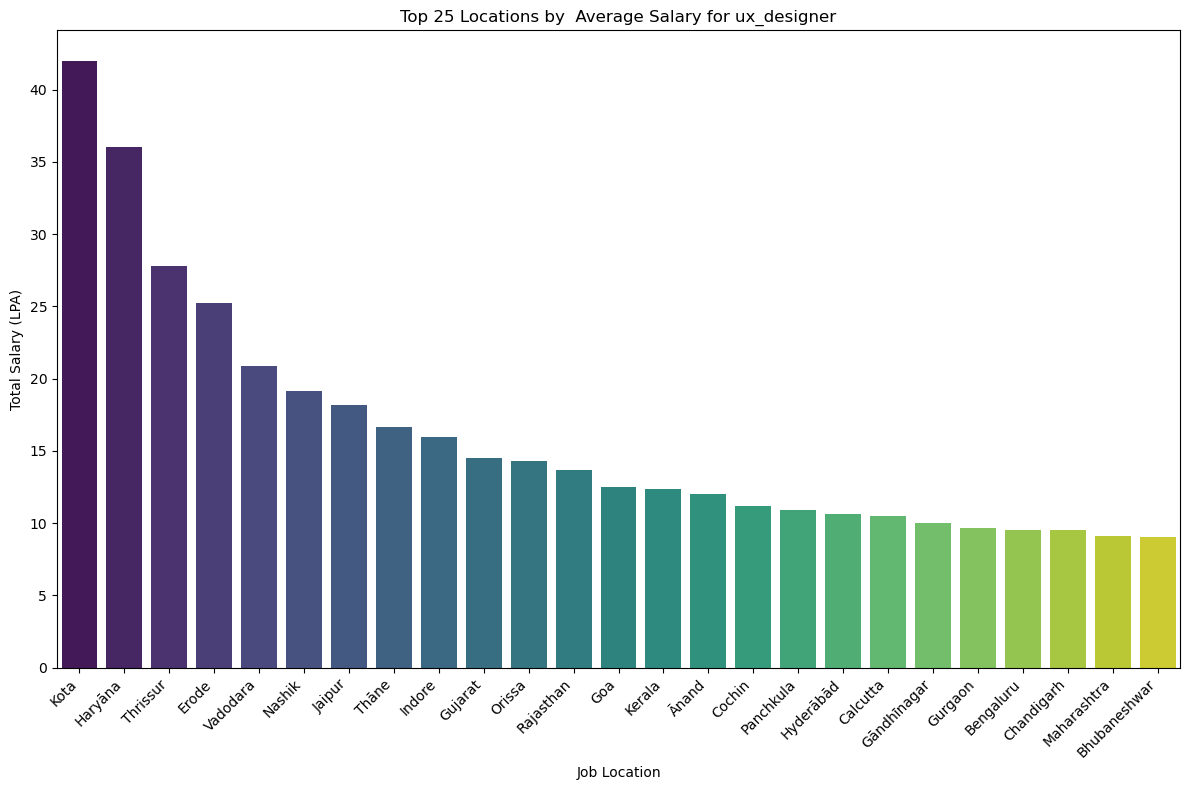

In [82]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

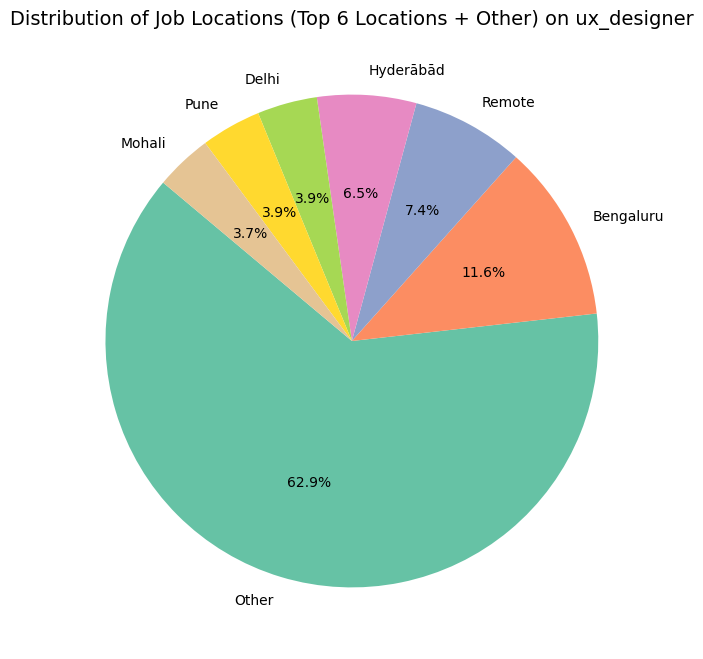

In [83]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

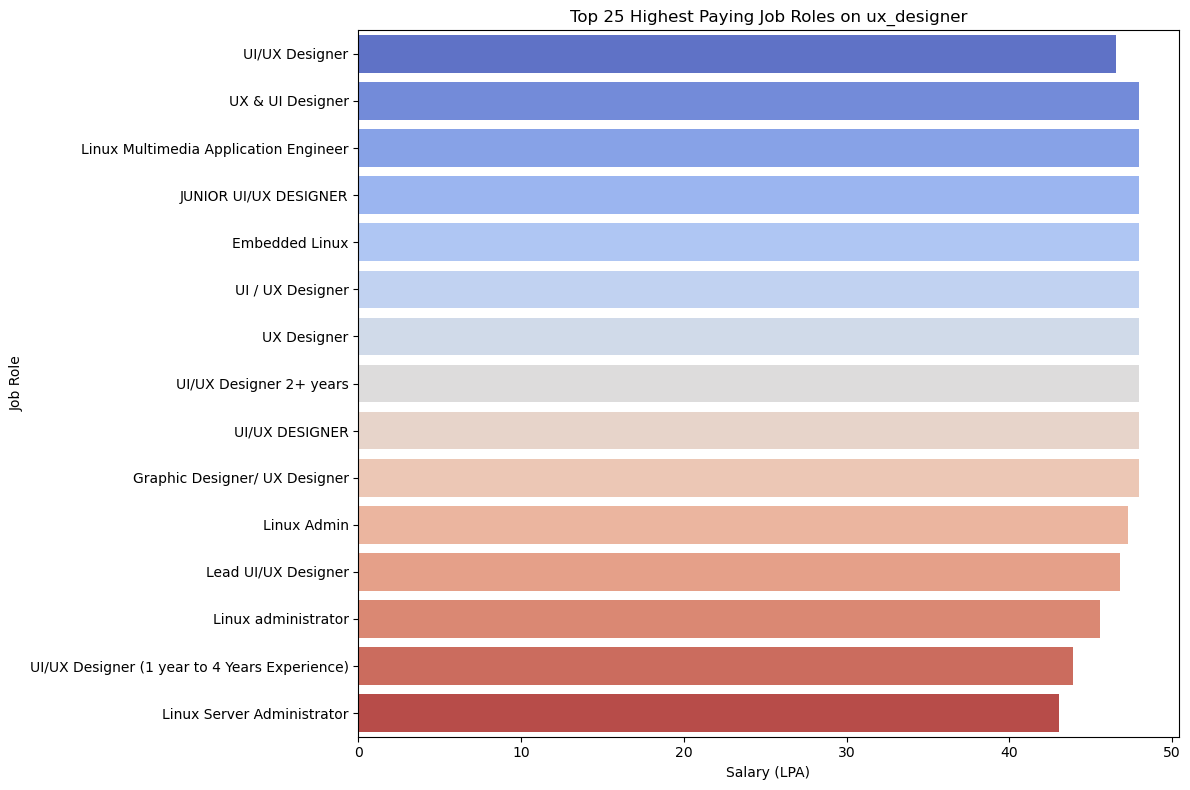

In [85]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [87]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_24232\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


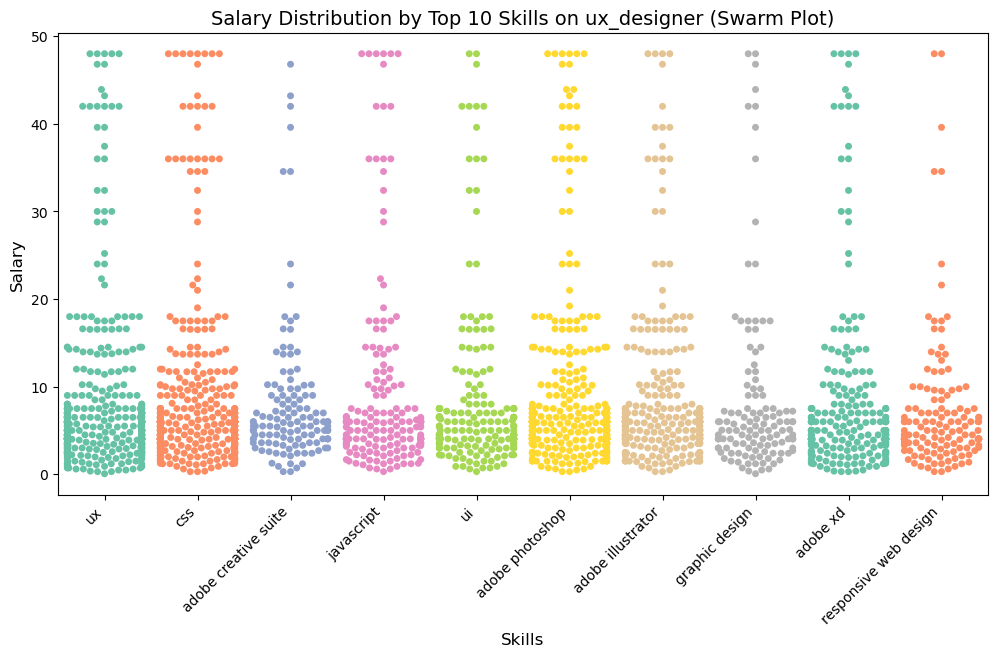

In [88]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

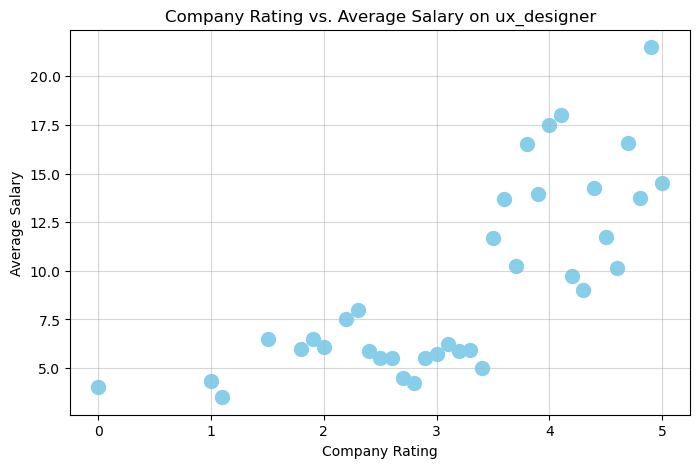

In [90]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [91]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.21658634265161256

In [127]:
import os

# Define the directory
directory = "../analysis_files"

# Count files in the directory
file_count = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

print(f"Number of files in '{directory}': {file_count}")


Number of files in '../analysis_files': 23
